# Laboratorio 3. Reconocimiento de caracteres manuscritos por CNN

In [1]:
#importar paquetes incluyendo tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from numpy.random import RandomState
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2021-08-18 20:22:42.538460: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-18 20:22:42.538834: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Importando datos train.csv, partiendo en test y train en y ademas diviediendo en "x,y" usando 0.7 como train y 0.3 como test.


datos = pd.read_csv('train.csv')

x = datos.iloc[:, :-1].values
y = datos.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, 
test_size=0.3, random_state=0)









In [3]:
#Poder ver la figura de las imagenes del dataframe para poder transformarlo mas facilmente.
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(29400, 784)
(12600, 784)
(12600,)
(29400,)


In [4]:
#Transformando la forma del dataframe para que sea una imagen de 28x28 pixeles. Ya con el 70 y 30 porciento como test y train

x_train = x_train.reshape(29400, 28, 28, 1)
x_test = x_test.reshape(12600, 28, 28, 1)



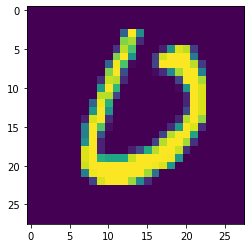

In [6]:
#Mostrando Algunas imagenes del train con plot segun su intensidad
plt.imshow(x_train[17])

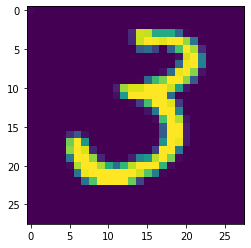

In [7]:
#Mostrando Algunas imagenes del train con plot segun su intensidad
plt.imshow(x_train[120])

In [8]:
# Funcion one_hot de pandas, pasando a categorico y se muestra nueva estructura

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


print(y_train_one_hot[0])

[1.]


In [55]:
#Haciendo el modelo de Redes neuronales convolucionales
model = Sequential()

# Agregando capas
model.add(Conv2D(64, kernel_size=2, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=2, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(30,activation='softmax'))

In [56]:
#Compilando el modelo, utilizando el optimizador "adam" de keras.io
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
#Entrenamiento de modelo y accuracy
hist = model.fit(x_train,y_train_one_hot, validation_data=(x_test,y_test_one_hot), epochs=1)

919/919 [==============================] - 51s 55ms/step - loss: 0.0613 - accuracy: 0.9989 - val_loss: 9.4611e-12 - val_accuracy: 1.0000


### Referencias: 
 * Keras.io.(2021). Optimizers. Extraído de: https://keras.io/api/optimizers/
 * Referencia de modelo convolucional: https://github.com/chandan450/MNIST-Handwritten-Digit-Classification
 * Tensorflow.org. (2021). Mnist dataset. Extraído de: http://localhost:8888/notebooks/CNN%20Lab%203.ipynb